In [2]:
import numpy as np
import cv2

import PIL.Image as Image
#import os

#import matplotlib.pylab as plt

#import tensorflow as tf
#import tensorflow_hub as tensorflow_hub

import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import pathlib

In [3]:
angry_dataset_dir = "dataset/train/angry"
disguist_dataset_dir = "dataset/train/disguist"
fear_dataset_dir = "dataset/train/fear"

happy_dataset_dir = "dataset/train/happy"
Neutral_dataset_dir = "dataset/train/neutral"
sad_dataset_dir = "dataset/train/sad"


angry_dataset_dir = pathlib.Path(angry_dataset_dir)
print(angry_dataset_dir)
disguist_dataset_dir = pathlib.Path(disguist_dataset_dir)
print(disguist_dataset_dir)
fear_dataset_dir = pathlib.Path(fear_dataset_dir)
print(fear_dataset_dir)
happy_dataset_dir = pathlib.Path(happy_dataset_dir)
print(happy_dataset_dir)
Neutral_dataset_dir = pathlib.Path(Neutral_dataset_dir)
print(Neutral_dataset_dir)
sad_dataset_dir = pathlib.Path(sad_dataset_dir)
print(sad_dataset_dir)

dataset\train\angry
dataset\train\disguist
dataset\train\fear
dataset\train\happy
dataset\train\neutral
dataset\train\sad


In [4]:
list(angry_dataset_dir.glob('*'))[:5]

[WindowsPath('dataset/train/angry/Training_10118481.jpg'),
 WindowsPath('dataset/train/angry/Training_10120469.jpg'),
 WindowsPath('dataset/train/angry/Training_10131352.jpg'),
 WindowsPath('dataset/train/angry/Training_10161559.jpg'),
 WindowsPath('dataset/train/angry/Training_1021836.jpg')]

In [5]:
image_count = len(list(angry_dataset_dir.glob('*')))
image_count

3995

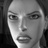

In [6]:
confused = list(angry_dataset_dir.glob("*"))
Image.open(str(confused[5])) 

In [7]:
image_dict = {
    'angry': list(angry_dataset_dir.glob('*')),
    'disguist' : list(disguist_dataset_dir.glob('*')),
    'fear': list(fear_dataset_dir.glob('*')),
    'happy' : list(happy_dataset_dir.glob('*')),
    'neutral': list(Neutral_dataset_dir.glob('*')),
    'sad' : list(sad_dataset_dir.glob('*')),
}

In [8]:
labels_dict = {
    'angry': 0,
    'disguist' : 1,
    'fear': 2,
    'happy' : 3,
    'neutral': 4,
    'sad' : 5,
}

labels_class = ['angry','disguist','fear','happy','neutral','sad',]

In [9]:
img = cv2.imread(str(image_dict['angry'][9]))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img.shape

(48, 48, 3)

In [10]:
X = []
y = []

for label, images in image_dict.items():
  for image in images:
    try:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(224,224))
      X.append(resized_img)
      y.append(labels_dict[label])
    except Exception as e:
      print(label)
      print(str(e))


In [11]:
X[0]

array([[[ 50,  50,  50],
        [ 50,  50,  50],
        [ 49,  49,  49],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 50,  50,  50],
        [ 50,  50,  50],
        [ 49,  49,  49],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 50,  50,  50],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 83,  83,  83]]

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
X[0].shape

(224, 224, 3)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_test.shape

(6276, 224, 224, 3)

In [16]:
#X_train = X_train / 255.0
#X_test = X_test / 255.0

for i in range(len(X_train)):
    X_train[i] = X_train[i] / 255.0

for i in range(len(X_test)):
    X_test[i] = X_test[i] / 255.0

In [17]:
#out_img = Image.fromarray(X_test[300],'RGB')
#out_img.show()

Data Augmentation

In [18]:
#data_augmentation = keras.Sequential(
#  [
#    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                 input_shape=(224, 224, 3)),
#    keras.layers.experimental.preprocessing.RandomRotation(0.1),
#    keras.layers.experimental.preprocessing.RandomZoom(0.1),
#  ]
#)

Transfer Learning

In [19]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [20]:
model = keras.Sequential([
#  data_augmentation,
  pretrained_model_without_top_layer,
  keras.layers.Dense(6,activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs = 10 , validation_data = (X_test, y_test))

Epoch 1/10
589/589 [==============================] - 474s 794ms/step - loss: 1.6182 - accuracy: 0.2657 - val_loss: 1.6096 - val_accuracy: 0.2914
Epoch 2/10
589/589 [==============================] - 424s 721ms/step - loss: 1.6014 - accuracy: 0.2721 - val_loss: 1.6345 - val_accuracy: 0.2930
Epoch 3/10
589/589 [==============================] - 418s 711ms/step - loss: 1.5976 - accuracy: 0.2748 - val_loss: 1.5973 - val_accuracy: 0.2900
Epoch 4/10
589/589 [==============================] - 419s 711ms/step - loss: 1.5900 - accuracy: 0.2781 - val_loss: 1.6106 - val_accuracy: 0.2079
Epoch 5/10
589/589 [==============================] - 416s 707ms/step - loss: 1.5844 - accuracy: 0.2864 - val_loss: 1.5909 - val_accuracy: 0.2973
Epoch 6/10
589/589 [==============================] - 415s 705ms/step - loss: 1.5863 - accuracy: 0.2818 - val_loss: 1.6080 - val_accuracy: 0.2192
Epoch 7/10
589/589 [==============================] - 413s 701ms/step - loss: 1.5802 - accuracy: 0.2861 - val_loss: 1.5988 -

In [23]:
import matplotlib.pyplot as plt

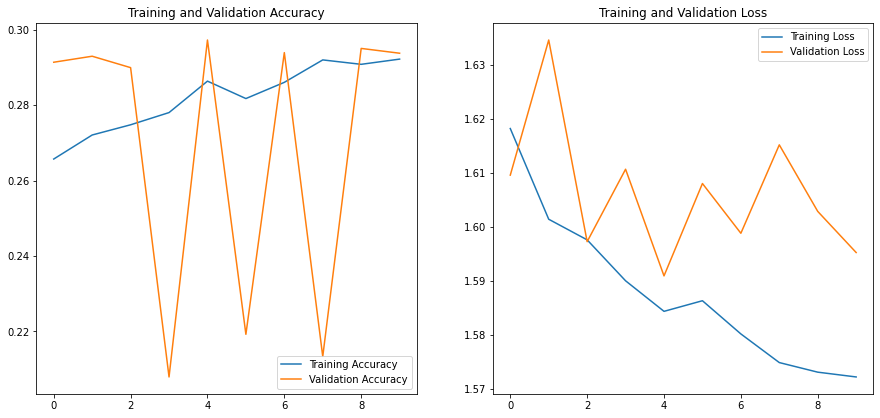

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
rohit_dataset_dir = "dataset/rohit"
rohit_dataset_dir = pathlib.Path(rohit_dataset_dir)

In [26]:
rohit_images = list(rohit_dataset_dir.glob('*'))
rohit_images

[WindowsPath('dataset/rohit/a1.jpeg'),
 WindowsPath('dataset/rohit/a2.jpeg'),
 WindowsPath('dataset/rohit/a3.jpeg'),
 WindowsPath('dataset/rohit/a4.jpeg'),
 WindowsPath('dataset/rohit/b1.jpeg'),
 WindowsPath('dataset/rohit/r1.jpeg'),
 WindowsPath('dataset/rohit/r2.jpeg'),
 WindowsPath('dataset/rohit/r3.jpeg'),
 WindowsPath('dataset/rohit/r4.png'),
 WindowsPath('dataset/rohit/r5.jpg'),
 WindowsPath('dataset/rohit/r6.png'),
 WindowsPath('dataset/rohit/r7.jpg'),
 WindowsPath('dataset/rohit/r8.jpeg')]

In [27]:
X_rohit = []

for image in rohit_images:
    img = cv2.imread(str(image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img,(224,224))
    X_rohit.append(resized_img)

In [28]:
X_rohit = np.array(X_rohit)
X_rohit = X_rohit / 255.0

In [29]:
predictions = model.predict(X_rohit)

1/1 [==============================] - 1s 1s/step


In [57]:
val = 5

In [58]:
rohit_pred_index = np.argmax(predictions[val])

Pridicted state:  neutral


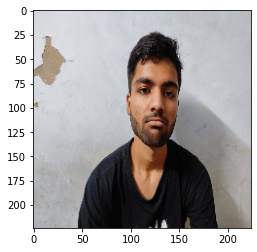

In [59]:
plt.imshow(X_rohit[val])
#plt.xlabel(labels_class[y_test[2]])
print("Pridicted state: ",labels_class[rohit_pred_index])